In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive/')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'
zipfile = 'us-historical-stock-prices-with-earnings-data.zip'
extfile = 'time_seriesSubmissionStock'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d tsaustin/us-historical-stock-prices-with-earnings-data

us-historical-stock-prices-with-earnings-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

CategoryModel_3ClassTwiter.h5
CategoryModel_5Class.h5
CategoryModel.h5
daily-climate-time-series-data.zip
dataset/
datasetCategory/
imdb/
imdb-synopsis-indonesian-movies.zip
kaggle.json
news-category-dataset.zip
time_series/
time_seriesSubmission/
time_seriesSubmissionStock/
trainingLog
trainingLog.csv
trainingSubmissionTimeSeriesLog.csv
trainingTwiterLog.csv
twiterredditsentimentanalyis/
twitter-and-reddit-sentimental-analysis-dataset.zip
us-historical-stock-prices-with-earnings-data.zip
vehicle-data-set.zip
VehicleModel.h5


In [ ]:
import zipfile as zf

try:
  extFile = zf.ZipFile(zipfile)
  extFile.extractall(extfile)
  extFile.close()
  print('extraksi dataset selesai')
except(FileExistsError,FileNotFoundError):
  print('Dataset tidak ditemukan')
except:
  print('terjadi kesalahan')
finally:
  print('operation terminated')

extraksi dataset selesai
operation terminated


In [ ]:
os.listdir(extfile)

['dataset_summary.csv', 'stocks_latest']

In [ ]:
dir = os.listdir(extfile)
datasetdir = os.path.join(extfile,dir[1])
files = os.listdir(datasetdir)
datasetfile = os.path.join(datasetdir,files[2])
print('Stock Price directory: {}'.format(datasetfile))

Stock Price directory: time_seriesSubmissionStock/stocks_latest/stock_prices_latest.csv


In [ ]:
import pandas as pd

loadData = pd.read_csv(datasetfile,delimiter=',',parse_dates=['date'])
loadData.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [ ]:
loadData.head(20)

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.8000,51.96,50.7500,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.8500,69.84,67.8500,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.4100,55.00,53.1700,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.0100,36.03,34.5600,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.6100,42.29,41.5100,42.25,38.6773,74640000,1.0
5,MSFT,2011-11-04,26.3800,26.40,26.0000,26.25,22.1877,36549200,1.0
6,MSFT,2011-12-06,25.8100,25.87,25.6100,25.66,21.8513,46175300,1.0
7,MSFT,2000-05-08,70.9400,71.37,69.6900,69.81,23.2360,18093800,1.0
8,MSFT,2017-05-08,68.9700,69.05,68.4200,68.94,67.8482,18446053,1.0
9,MSFT,2011-10-17,27.1139,27.42,26.8500,26.98,22.8048,39453300,1.0


In [ ]:
loadData.symbol.unique()

array(['MSFT', 'AAPL', 'EBAY', ..., 'RSF', 'SONM', 'AXLA'], dtype=object)

symbol = loadData.symbol.unique()
qty = len(symbol)
stock = 'MSFT'
print('Banyak Category {}'.format(qty))

#Data = loadData.loc[loadData['symbol'] == stock]
Data = loadData
print('banyak data Stock {}: {}'.format(stock,len(Data)))

In [ ]:
Data = loadData
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22228563 entries, 0 to 22228562
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   symbol             object        
 1   date               datetime64[ns]
 2   open               float64       
 3   high               float64       
 4   low                float64       
 5   close              float64       
 6   close_adjusted     float64       
 7   volume             int64         
 8   split_coefficient  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1.5+ GB


In [ ]:
Data.isnull().sum()

symbol               0
date                 0
open                 0
high                 0
low                  0
close                0
close_adjusted       0
volume               0
split_coefficient    0
dtype: int64

In [ ]:
normalizedata = Data.drop(columns=['symbol'])
normalizedata = normalizedata.drop(columns=['open'])
normalizedata = normalizedata.drop(columns=['high'])
normalizedata = normalizedata.drop(columns=['low'])
normalizedata = normalizedata.drop(columns=['close_adjusted'])
normalizedata = normalizedata.drop(columns=['volume'])
normalizedata = normalizedata.drop(columns=['split_coefficient'])
normalizedata.head(10)

,date,close
0,2016-05-16,51.83
1,2002-01-16,67.87
2,2001-09-18,54.32
3,2007-10-26,35.03
4,2014-06-27,42.25
5,2011-11-04,26.25
6,2011-12-06,25.66
7,2000-05-08,69.81
8,2017-05-08,68.94
9,2011-10-17,26.98


In [ ]:
closeD = normalizedata.close.values
closeN = []
for i in range(len(closeD)):
  closeN.append((closeD[i]*1000))
normalizedata['close'] = closeN
normalizedata.head()

,date,close
0,2016-05-16,51830.0
1,2002-01-16,67870.0
2,2001-09-18,54320.0
3,2007-10-26,35030.0
4,2014-06-27,42250.0


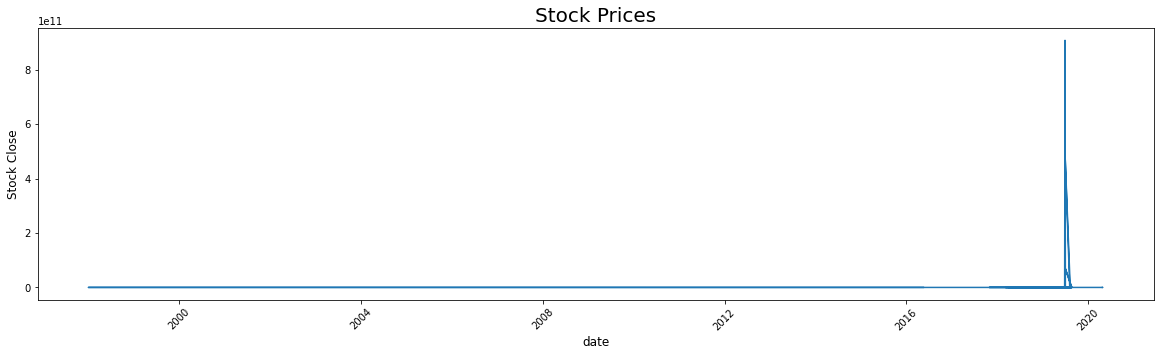

In [ ]:
import matplotlib.pyplot as plt

qty = 5000
date = normalizedata.date.values
close = normalizedata.close.values
Title = 'Stock Prices'

def plotting(Xaxes=[],Yaxes=[],title=''):
  plt.figure(figsize=(20,5))
  plt.plot(Xaxes,Yaxes)
  plt.xticks(rotation=45)
  plt.title(title,fontsize=20)
  plt.xlabel('date',fontsize=12)
  plt.ylabel('Stock Close',fontsize=12)
  plt.show()

plotting(date,close,Title)

In [ ]:
normalizedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22228563 entries, 0 to 22228562
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   close   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 339.2 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import datetime

data = normalizedata.values

time = []
stockClose = []

for i in range(len(data)):
  time.append(data[i,0])
  stockClose.append(data[i,1])

time = pd.DataFrame({'datetime':time})
stockClose = pd.DataFrame({'close':stockClose})

def normalize(normalData):
    """Normalize the DF using min/max"""
    scaler = MinMaxScaler(feature_range=(-1, 1))
    dates_scaled = scaler.fit_transform(normalData.values)
    return dates_scaled


time = normalize(time)
stckcls = normalize(stockClose)  
timeFinal = []
pwrFinal = []
for i in range(len(time)):
  timeFinal.append(time[i,0])
  pwrFinal.append(stckcls[i,0])

finalDataCloseStock = pd.DataFrame({'datetime':timeFinal ,'close':pwrFinal})

finalDataCloseStock.head(10)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit(n_splits=4)#20% validation
data = finalDataCloseStock.values

for tr_index,val_index in tscv.split(finalDataCloseStock):
  traindata,testdata = pd.DataFrame({'datetime':data[tr_index,0],'pjm_mw':data[tr_index,1]}) , pd.DataFrame({'datetime':data[val_index,0],'pjm_mw':data[val_index,1]})  
n_steps = 1
n_feature = 1

data_train = traindata.values

data_test = testdata.values

print('total dataset awal: {}'.format(len(normalizedata)))
print('train data qty: {}'.format(len(traindata)))
print('test data qty : {}'.format(len(testdata)))

total dataset awal: 22228563
train data qty: 17782851
test data qty : 4445712


In [ ]:
import tensorflow as tf
from tensorflow import keras


def windowed_dataset(series,windows_size,batch_size,shuffle_buffer):
  series = tf.expand_dims(series,axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(windows_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(windows_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:1], w[1:]))
  return ds.batch(batch_size).prefetch(1)

train_close_set = windowed_dataset(data_train,windows_size=60,batch_size=100,shuffle_buffer=1000)
test_close_set = windowed_dataset(data_test,windows_size=60,batch_size=100,shuffle_buffer=1000)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

model = Sequential()
model.add(Bidirectional(LSTM(1024,activation='relu',return_sequences=True),input_shape=(n_steps,n_feature)))
model.add(Bidirectional(LSTM(1024,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(512,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(120,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(60,activation='relu')))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#optimizer = SGD(lr=1.000e-04,momentum=0.9)
#optimizer = Adam(lr=1.000e-04)
optimizer = Adam(lr=2.000e-04)
model.compile(
    loss = Huber(),
    optimizer = optimizer,
    metrics=['mae']
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_51 (Bidirectio (None, 1, 2048)           8404992   
_________________________________________________________________
bidirectional_52 (Bidirectio (None, 1, 2048)           25174016  
_________________________________________________________________
bidirectional_53 (Bidirectio (None, 1, 1024)           10489856  
_________________________________________________________________
bidirectional_54 (Bidirectio (None, 1, 240)            1099200   
_________________________________________________________________
bidirectional_55 (Bidirectio (None, 120)               144480    
_________________________________________________________________
flatten_9 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 1024)             

In [ ]:
import tensorflow as tf
MAE_TRESHOLD = 0.10

class Callback(tf.keras.callbacks.Callback):
  def onE(self,epoch,logs={}):
    if(logs.get('mae') < MAE_TRESHOLD):
      print('{}% MAE\nEnd Training'.fromat(MAE_TRESHOLD*100))
      self.model.stop_training = True
     

callbackval = Callback()
saveLog =  tf.keras.callbacks.CSVLogger('trainingSubmissionTimeSeriesLog.csv',separator=',')

with tf.device('/device:GPU:0'):
  history = model.fit(
                    train_close_set,
                    epochs=100,
                    steps_per_epoch=100,
                    validation_data = test_close_set,
                    validation_steps=50,
                    batch_size=64,
                    callbacks = [callbackval,saveLog],
                    verbose=1
                    )

model.save('TimeSeriesmodel(Stock).h5')

Epoch 1/100


ValueError: ignored

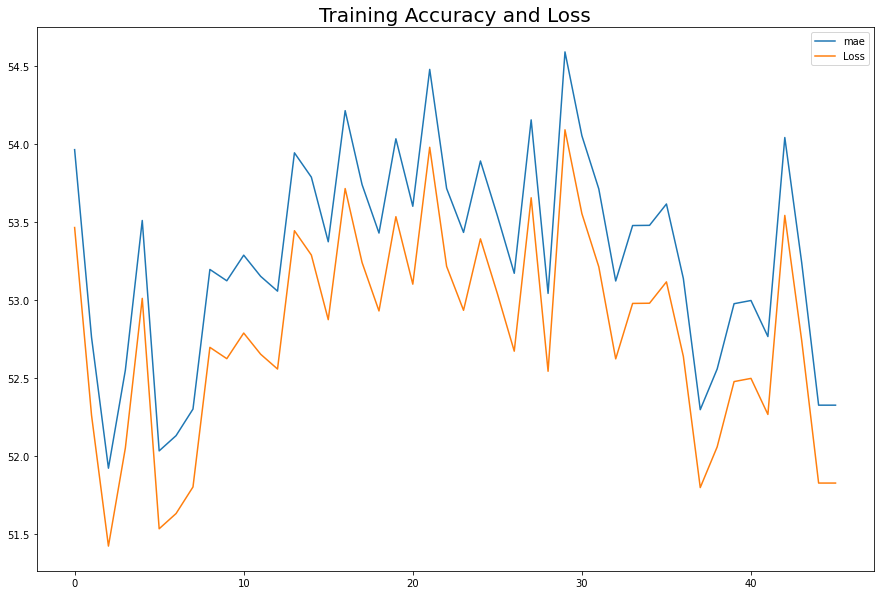

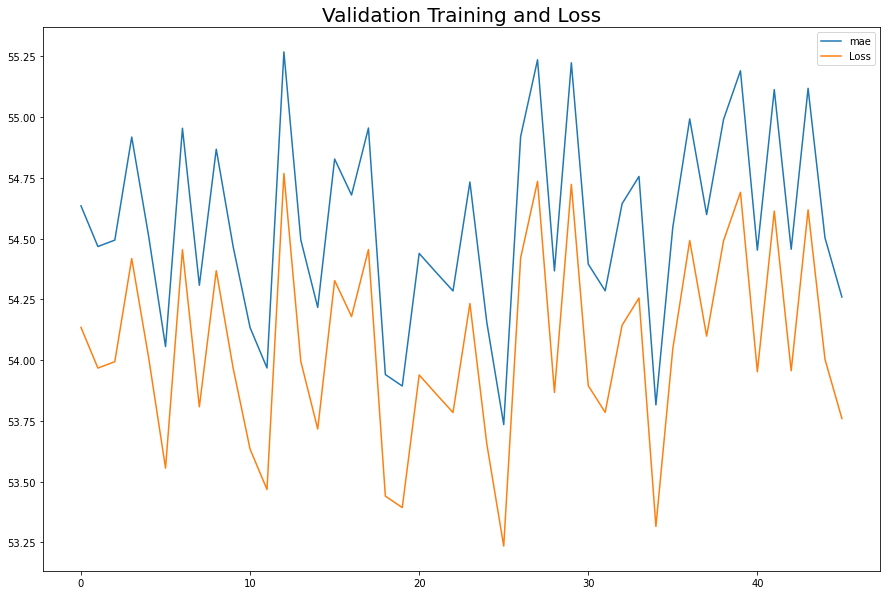

In [ ]:
mae = history.history['mae']
loss = history.history['loss']
epoch = range(len(mae))
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']


def Trainplotting(Xaxes=[],Yaxes=[],Yval =[],title=''):
  plt.figure(figsize=(15,10))
  plt.plot(Xaxes,Yaxes,label='mae')
  plt.plot(Xaxes, Yval,label='Loss')
  plt.legend()
  plt.title(title,fontsize=20)
  plt.show()
 
Trainplotting(epoch,mae,loss,title='Training Accuracy and Loss')
print('\n\n')
Trainplotting(epoch,val_mae,val_loss,title='Validation Training and Loss')